<a href="https://colab.research.google.com/github/YanuarN/HarvestHeroes/blob/Luthfi/Machine%20Learning/Corn/Corn_Harvest_Hero_Model%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries and Kaggle Userkey**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import files
from tensorflow.keras.models import load_model
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### **Importing Data From Kaggle**

In [ ]:
!kaggle datasets download -d starvestrangers/corn-2
!unzip corn-2.zip -d corn_data


Streaming output truncated to the last 5000 lines.
  inflating: corn_data/train/sticky_insect/IMG_20230430_143326_jpg.rf.bfec4a42c19a64ca06a992047caeaaae.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143329_jpg.rf.877ab372942fbafe1edb6fd713c7c602.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143332_jpg.rf.41517527e1931674480ba07e5848329e.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143342_jpg.rf.de17e344f5f4d2f0ea8cfa45fb089796.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143536_jpg.rf.5143230439317fddee40660d42ba1ada.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143538_jpg.rf.f488000bc4d011b3b706210bf7317af6.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143544_jpg.rf.d983ab2e401110eb0714dbaa04ed258a.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143632_jpg.rf.0e6bf0700ebaab4e4be8aa35b9f4813c.jpg  
  inflating: corn_data/train/sticky_insect/IMG_20230430_143638_jpg.rf.1439921

### **Importing Data Into Tensor and Preprocess Imaga Data**

In [ ]:
TRAINING_DIR = '/content/corn_data/train'
VALIDATION_DIR = '/content/corn_data/valid'
TEST_DIR = '/content/corn_data/test'

#Preparing Training Data
train_datagen = ImageDataGenerator(rescale=1./255.)


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode='categorical')
#Preparing Validation Data
validation_datagen = ImageDataGenerator(rescale=1. / 255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(224,224),
                                                              batch_size = 50,
                                                              class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255.)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (224,224),
                                                  batch_size=20,
                                                  class_mode='categorical')




Found 13616 images belonging to 12 classes.
Found 3889 images belonging to 12 classes.
Found 1946 images belonging to 12 classes.


In [ ]:
#Class for the model
print(train_generator.class_indices)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3, 'Leaf_Beetle': 4, 'Mold': 5, 'Northern_Leaf_Blight': 6, 'Phosphorus_Deficiency': 7, 'Potassium_Deficiency': 8, 'Red_spider': 9, 'sticky_insect': 10, 'yellow_striped_flea_beetle': 11}


### **Model #1 for Corn Disease Detection**

In [ ]:
import tensorflow as tf

# Define the model
model_1 = tf.keras.models.Sequential([

    # First Convolutional Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1), input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Third Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Dropout Layer for the regularization
    tf.keras.layers.Dropout(0.75),

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(56, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(12, activation='softmax')
])

# Compile the model
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['acc']
)

# Fit the model
corn_model = model_1.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20
273/273 [==============================] - 121s 419ms/step - loss: 1.4303 - acc: 0.5037 - val_loss: 0.9682 - val_acc: 0.6521
Epoch 2/20
273/273 [==============================] - 109s 400ms/step - loss: 0.9328 - acc: 0.6673 - val_loss: 0.8441 - val_acc: 0.7092
Epoch 3/20
273/273 [==============================] - 107s 393ms/step - loss: 0.7891 - acc: 0.7208 - val_loss: 0.7827 - val_acc: 0.7220
Epoch 4/20
273/273 [==============================] - 105s 383ms/step - loss: 0.7043 - acc: 0.7519 - val_loss: 0.6411 - val_acc: 0.7817
Epoch 5/20
273/273 [==============================] - 106s 386ms/step - loss: 0.5966 - acc: 0.7846 - val_loss: 0.6208 - val_acc: 0.7758
Epoch 6/20
273/273 [==============================] - 104s 381ms/step - loss: 0.5507 - acc: 0.8030 - val_loss: 0.5281 - val_acc: 0.8195
Epoch 7/20
273/273 [==============================] - 103s 378ms/step - loss: 0.4916 - acc: 0.8248 - val_loss: 0.5752 - val_acc: 0.7948
Epoch 8/20
273/273 [============================

### **Saved Model #1**

In [ ]:
from google.colab import files
model_1.save('Prototype_Corn_1.h5')
files.download('Prototype_Corn_1.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Load Model #1**

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Prototype_Corn_1.h5')


### **Model #1 Evaluation Accuracy on Test Data**

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


98/98 [==============================] - 7s 41ms/step - loss: 0.5155 - acc: 0.8530
Test Loss: 0.515498161315918
Test Accuracy: 0.8530318737030029


### **Predicting Self Input Image**

Saving cr-72-_png.rf.d44456bd808489363933f848b16eb6c9.jpg to cr-72-_png.rf.d44456bd808489363933f848b16eb6c9.jpg


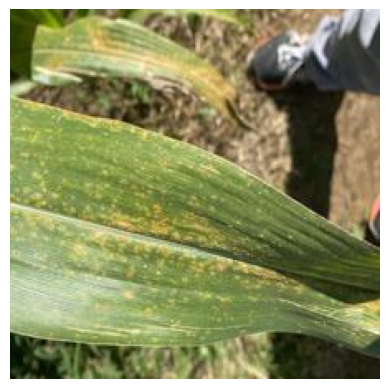

Classifying image: cr-72-_png.rf.d44456bd808489363933f848b16eb6c9.jpg
1/1 [==============================] - 0s 28ms/step
Prediction: Common_Rust
index: 1


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Define the class labels
class_labels = [
    'Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy', 'Leaf_Beetle',
    'Mold', 'Northern_Leaf_Blight', 'Phosphorus_Deficiency', 'Potassium_Deficiency',
    'Red_spider', 'sticky_insect', 'yellow_striped_flea_beetle'
]


# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224, 3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to make prediction
def classify_image(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = class_labels[class_idx]
    return class_label, class_idx

# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
    # Display the image
    img_path = fn
    img = image.load_img(img_path, target_size=(224, 224, 3))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Classify the image
    print(f"Classifying image: {fn}")
    result, class_idx = classify_image(img_path)
    print(f"Prediction: {result}")
    print(f"index: {class_idx}")